This notebook was written in Google Colab

Import required modules

In [2]:
!pip install tensorflow-gpu==2.8.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 985.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 46.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing inst

In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.8.1


In [5]:
import numpy as np
import matplotlib.pyplot as plt


Clone the repo that contains the malaria images dataset


In [6]:
!git clone https://github.com/DevSam30/Malaria-Classification-CEMA.git

Cloning into 'Malaria-Classification-CEMA'...
remote: Enumerating objects: 27567, done.
remote: Total 27567 (delta 0), reused 0 (delta 0), pack-reused 27567
Receiving objects: 100% (27567/27567), 331.64 MiB | 85.37 MiB/s, done.
Updating files: 100% (27561/27561), done.


Preprocessing images

In [7]:
img_width = 64
img_height = 64

In [8]:
datagen = ImageDataGenerator(rescale = 1/255.0, validation_split=0.2)


Generating a train set and a validation set

In [9]:
train_data_generator = datagen.flow_from_directory(
    directory = '/content/Malaria-Classification-CEMA/Malaria-Classification-Using-CNN-master/malaria-dataset',
    target_size = (img_width, img_height),
    class_mode = 'binary',
    batch_size = 16,
    subset = 'training'
)

Found 22048 images belonging to 2 classes.


In [11]:
validation_data_generator = datagen.flow_from_directory(
    directory = '/content/Malaria-Classification-CEMA/Malaria-Classification-Using-CNN-master/malaria-dataset',
    target_size = (img_width, img_height),
    class_mode = 'binary',
    batch_size = 16,
    subset = 'validation'
)

Found 5510 images belonging to 2 classes.


Building the CNN Model

In [12]:
model = Sequential() # layers will be added sequentially

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit_generator(
    generator = train_data_generator,
    steps_per_epoch = len(train_data_generator),
    epochs = 5,
    validation_data = validation_data_generator,
    validation_steps = len(validation_data_generator)
)

Epoch 1/5


<ipython-input-15-125048b026e1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


1378/1378 [==============================] - 29s 20ms/step - loss: 0.5298 - accuracy: 0.7246 - val_loss: 0.2155 - val_accuracy: 0.9287
Epoch 2/5
1378/1378 [==============================] - 28s 20ms/step - loss: 0.2219 - accuracy: 0.9257 - val_loss: 0.1931 - val_accuracy: 0.9319
Epoch 3/5
1378/1378 [==============================] - 28s 20ms/step - loss: 0.2019 - accuracy: 0.9364 - val_loss: 0.1946 - val_accuracy: 0.9341
Epoch 4/5
1378/1378 [==============================] - 28s 21ms/step - loss: 0.1882 - accuracy: 0.9423 - val_loss: 0.1733 - val_accuracy: 0.9352
Epoch 5/5
1378/1378 [==============================] - 28s 20ms/step - loss: 0.1797 - accuracy: 0.9441 - val_loss: 0.1704 - val_accuracy: 0.9439


In [16]:
history.history

{'loss': [0.5297921895980835,
  0.22188544273376465,
  0.2019285410642624,
  0.18818719685077667,
  0.17966105043888092],
 'accuracy': [0.7246008515357971,
  0.9257075190544128,
  0.936366081237793,
  0.9422623515129089,
  0.9441218972206116],
 'val_loss': [0.21546241641044617,
  0.1930699348449707,
  0.1945519596338272,
  0.17330360412597656,
  0.17042970657348633],
 'val_accuracy': [0.92867511510849,
  0.9319419264793396,
  0.9341197609901428,
  0.9352087378501892,
  0.9439201354980469]}

In [17]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

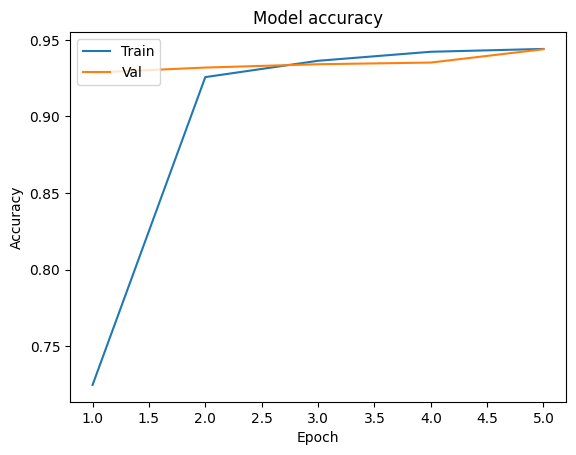

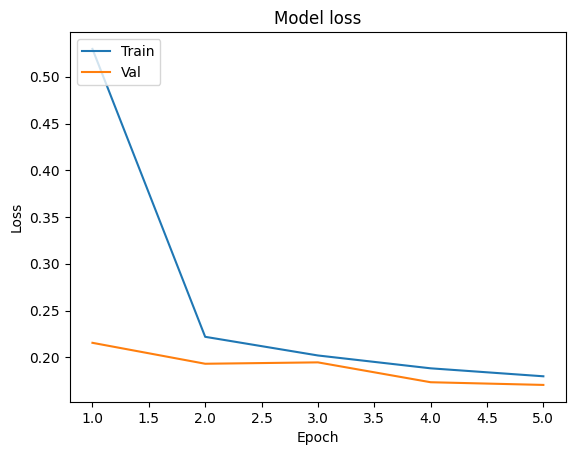

In [18]:
plot_learningCurve(history, 5)